In [ ]:
!git clone https://github.com/d-li14/mobilenetv3.pytorch

fatal: destination path 'mobilenetv3.pytorch' already exists and is not an empty directory.


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
from matplotlib import style
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid
from PIL import Image
import numpy as np
import os
from torch.utils.data.sampler import SubsetRandomSampler
import pandas as pd
style.use("ggplot")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!sudo rm -r /content/Herd12/

In [ ]:
!cp -r /content/Herd14 /content/drive/'My Drive'/Herd/Herd14v1

In [ ]:
!cp -r /content/drive/'My Drive'/Herd/Herd14v1/Herd14 /content

In [ ]:
%cd /content/Herd14

/content/Herd14


In [ ]:
!unzip -q Herd14v1.zip

In [ ]:
%cd /content

/content


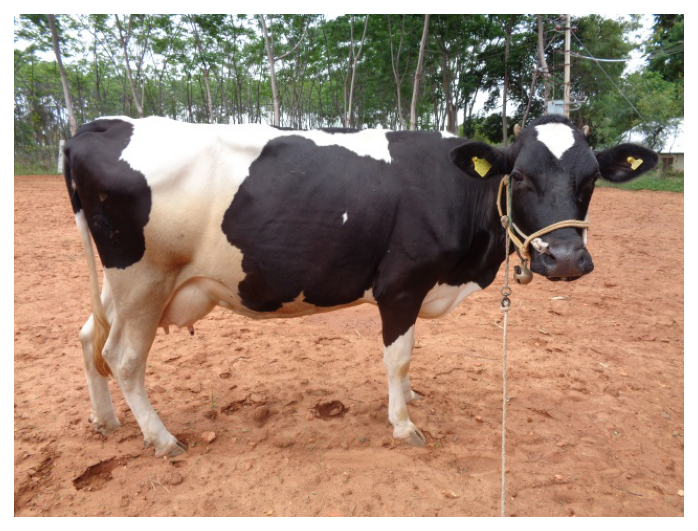

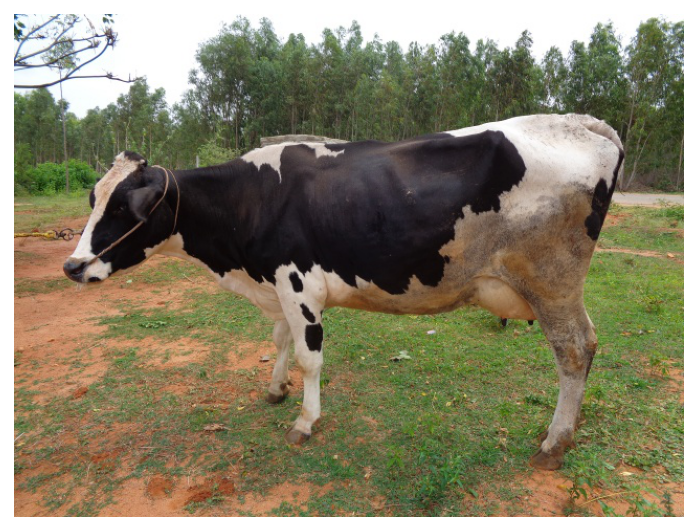

In [ ]:
img_dir='/content/Herd14/Herd14v1/'
img_dir1='/content/Herd14/test/'
def imshow(image):
    """Display image"""
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()
# Example image
x = Image.open(img_dir + 'cow4/DSC01183.JPG')
y = Image.open(img_dir1 + 'cow5/DSC01330.JPG')
np.array(x).shape
imshow(x)
np.array(y).shape
imshow(y)

In [ ]:
# Define your transforms for the training, validation, and testing sets
train_transforms = transforms.Compose([
                                      #  transforms.RandomCrop(256, padding=4, padding_mode='reflect'),
                                       transforms.RandomResizedCrop(224, scale=(0.8,0.9), ratio=(1, 1)),
                                      transforms.RandomRotation(degrees=10),
                                      transforms.ColorJitter(contrast=0.1),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.CenterCrop(size=200),  # Image net standards
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225]),
                                      transforms.RandomErasing(inplace=True)
                                      ])

test_transforms = transforms.Compose([transforms.Resize(224),
                                      transforms.CenterCrop(size=200),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], 
                                                           [0.229, 0.224, 0.225])])

validation_transforms = transforms.Compose([transforms.Resize(224),
                                            transforms.CenterCrop(size=200),
                                            transforms.ToTensor(),
                                            transforms.Normalize([0.485, 0.456, 0.406], 
                                                                 [0.229, 0.224, 0.225])])

In [ ]:
#Loading in the dataset

train_data = datasets.ImageFolder(img_dir,transform=train_transforms)
test_data = datasets.ImageFolder(img_dir1,transform=test_transforms)
# number of subprocesses to use for data loading
num_workers = 3
# percentage of training set to use as validation
#valid_size = 0.15

#test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)
print(num_train)
num_test = len(test_data)
print(num_test)
indices = list(range(num_train))
indices1 = list(range(num_test))
np.random.shuffle(indices)
np.random.shuffle(indices1)
#valid_split = int(np.floor((valid_size) * num_train))
test_split = int(np.floor(num_test))
#valid_idx, test_idx, train_idx = indices[:valid_split], indices1[:test_split], indices[valid_split:]
 

#print(len(valid_idx), len(test_idx), len(train_idx)) 


152
16


In [ ]:
# scikit-learn k-fold cross-validation
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = np.array(indices)
# prepare cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
# enumerate splits
for train, valid in kfold.split(data):
  print('train: %s, valid: %s' % (data[train], data[valid]))
  
#valid_idx, test_idx, train_idx = indices[:valid], indices1[:test_split], indices[valid:]
#valid_idx, test_idx, train_idx = data[valid], indices1[:test_split], data[train]

#print(len(valid_idx), len(test_idx), len(train_idx)) 

train: [ 49  17  42  12  83  52 149  19  92  34  87  65  44  98  23  53  28 143
  85  81  25  61 114  70 145  71 129 148  67   7  93  69  21 137  99 122
  90  10 126 109 103  68  31  78  50 151 146   8  59 134  88 118  80 123
 105  51 125  60  11 140  66  77  55  13  16  63 102  94 119 108  18  38
 130 107  89 121  72 131  26  82 141  58  29  64  84 124 112 110   0  24
  75 106  96  32 135  86  73  33 128  43  39  54  62  91  27 120 127  35
  95 111 142  40  36  22 113 150 139 104 147  47 101], valid: [136 132 133   5  41  20  97  57 144   2  48   4   6  56 100  45 115  46
  30 138   3  76  79  14  74  37   9  15 116 117   1]
train: [ 49  17  42  12 136  52 149  19  92  34  87  44 132  98 133 143  85  81
  25  61 114  70 145   5 129  41 148  20  67  97  93  69  57 137 144  99
   2  90  10 109 103  31  48   4  78 151   6   8  59 134  88 118  80 105
  51  56 125  60  11  66  55 100  16  63 102  94 119  45  18  38 130 115
 107  46  30 138  89   3 121  76  72  79  14 131  74  82 141  58  3

In [ ]:
test_idx = indices1[:test_split]

In [ ]:
valid_idx, test_idx, train_idx = data[valid], indices1[:test_split], data[train]
print(train_idx, valid_idx)
print(len(valid_idx), len(test_idx),len(train_idx))

[ 49  42  12  83 136  52  92  34  87  65 132  98 133  23  53  28  85  25
  61  70 145  71   5 129  41 148  20  67  97   7  69  21  57 137 144  99
   2 122  90  10 126 109  68  31  48   4  78  50 146   6 134 118  80 123
 105  56 125 140  66  77  55  13 100  63  94 119 108  45  38 115 107  46
  30 138  89   3  76  72  79  14  74  26  82 141  58  37  29  64  84 124
 112 110   0  75 106  96  32 135  86   9  73  15  33 128 116  54  62  91
 127  35 117 111  40  36  22 150   1 139 104 147  47 101] [ 17 149  19  44 143  81 114  93 103 151   8  59  88  51  60  11  16 102
  18 130 121 131  24  43  39  27 120  95 142 113]
30 16 122


In [ ]:
train_display_loader = torch.utils.data.DataLoader(train_data, 8, shuffle=True, num_workers=3, pin_memory=True)
# valid_loader = torch.utils.data.DataLoader(train_data, 32, num_workers=2, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


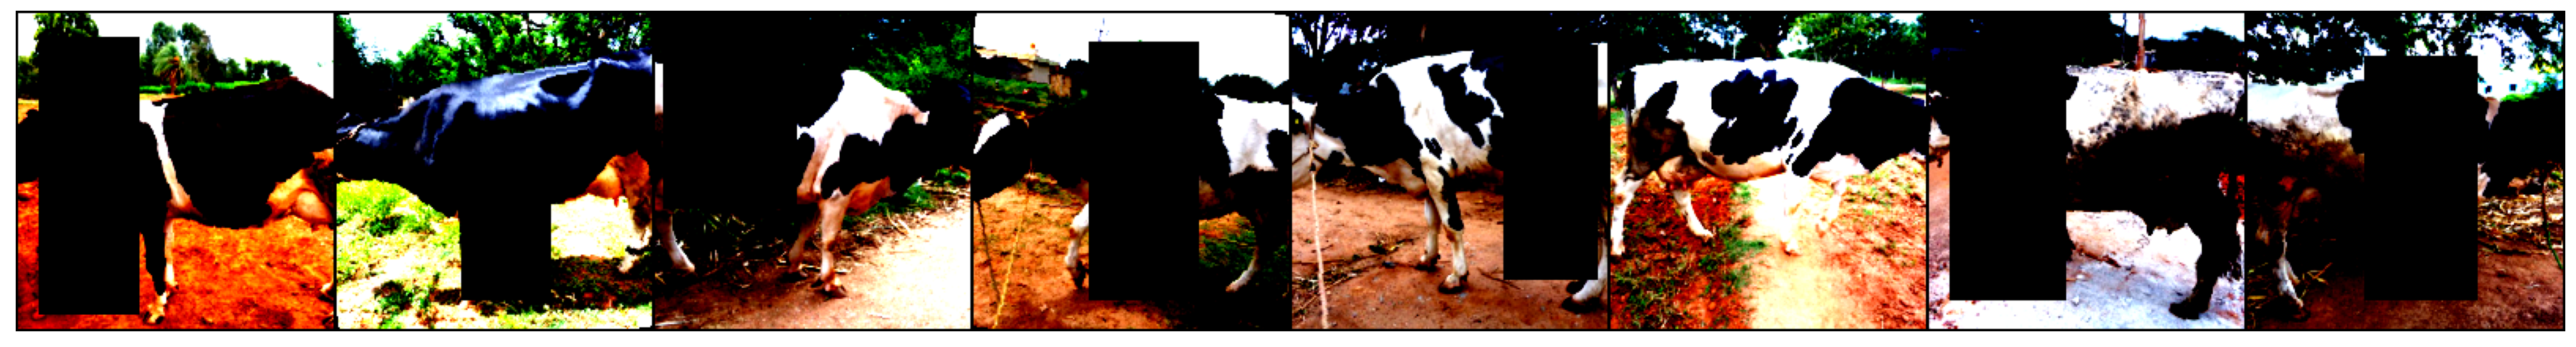

In [ ]:
def show_batch(dl, invert=True):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(32, 8))
        ax.set_xticks([]); ax.set_yticks([])
        data = 1-images if invert else images
        ax.imshow(make_grid(data, nrow=16).permute(1, 2, 0))
        break

show_batch(train_display_loader, invert=False)

/content/mobilenetv3.pytorch
/content
2 1 1
Epoch: 1 	Training Loss: 344.893566 	Validation Loss: 307.876539 	Validation Accuracy: 0.000000
Validation loss decreased (inf --> 307.876539).  Saving model ...
Time per epoch: 1.856 seconds
Epoch: 2 	Training Loss: 493.029901 	Validation Loss: 165.021286 	Validation Accuracy: 0.166667
Validation loss decreased (307.876539 --> 165.021286).  Saving model ...
Time per epoch: 1.811 seconds
Epoch: 3 	Training Loss: 659.008873 	Validation Loss: 143.490629 	Validation Accuracy: 0.133333
Validation loss decreased (165.021286 --> 143.490629).  Saving model ...
Time per epoch: 1.809 seconds
Epoch: 4 	Training Loss: 435.359141 	Validation Loss: 117.474031 	Validation Accuracy: 0.066667
Validation loss decreased (143.490629 --> 117.474031).  Saving model ...
Time per epoch: 1.876 seconds
Epoch: 5 	Training Loss: 205.263750 	Validation Loss: 62.232914 	Validation Accuracy: 0.233333
Validation loss decreased (117.474031 --> 62.232914).  Saving model ...


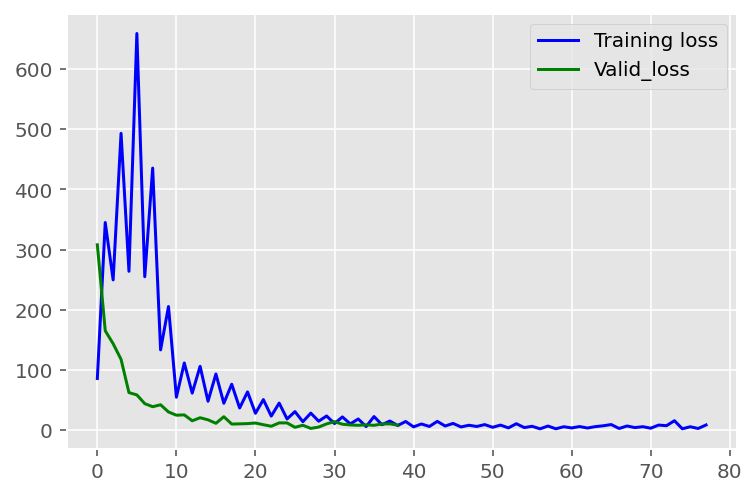

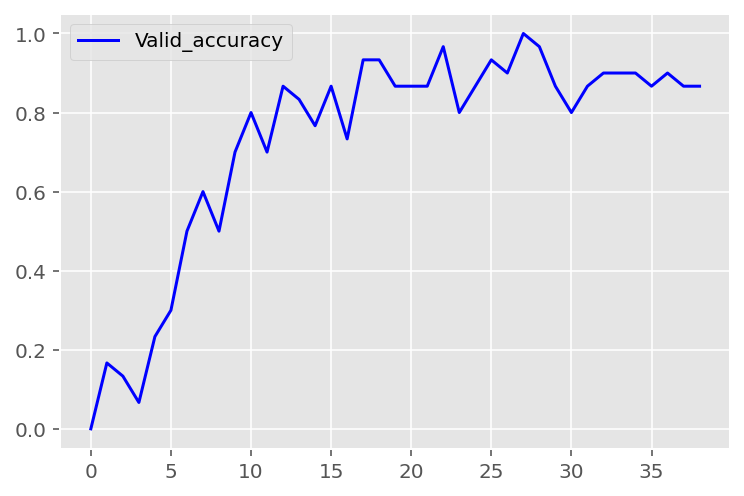

/content/mobilenetv3.pytorch
/content
2 1 1
Epoch: 1 	Training Loss: 341.796291 	Validation Loss: 247.472649 	Validation Accuracy: 0.033333
Validation loss decreased (inf --> 247.472649).  Saving model ...
Time per epoch: 1.905 seconds
Epoch: 2 	Training Loss: 502.032510 	Validation Loss: 192.351823 	Validation Accuracy: 0.133333
Validation loss decreased (247.472649 --> 192.351823).  Saving model ...
Time per epoch: 1.833 seconds
Epoch: 3 	Training Loss: 667.163004 	Validation Loss: 187.780294 	Validation Accuracy: 0.300000
Validation loss decreased (192.351823 --> 187.780294).  Saving model ...
Time per epoch: 1.871 seconds
Epoch: 4 	Training Loss: 419.470732 	Validation Loss: 149.264975 	Validation Accuracy: 0.033333
Validation loss decreased (187.780294 --> 149.264975).  Saving model ...
Time per epoch: 1.860 seconds
Epoch: 5 	Training Loss: 181.831290 	Validation Loss: 92.258105 	Validation Accuracy: 0.200000
Validation loss decreased (149.264975 --> 92.258105).  Saving model ...


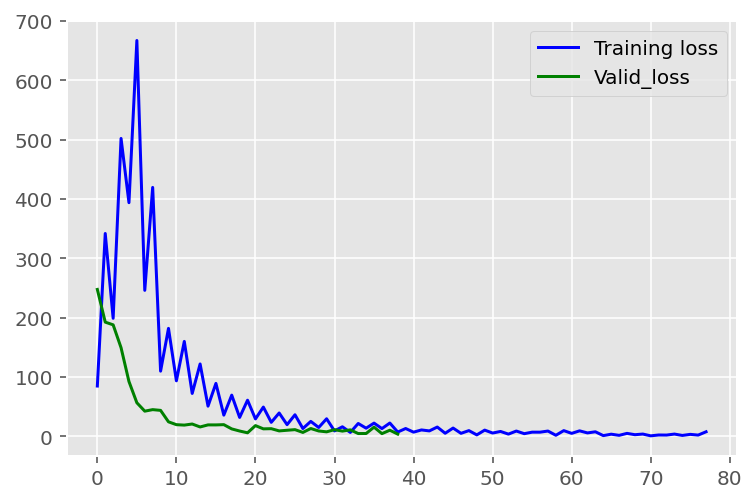

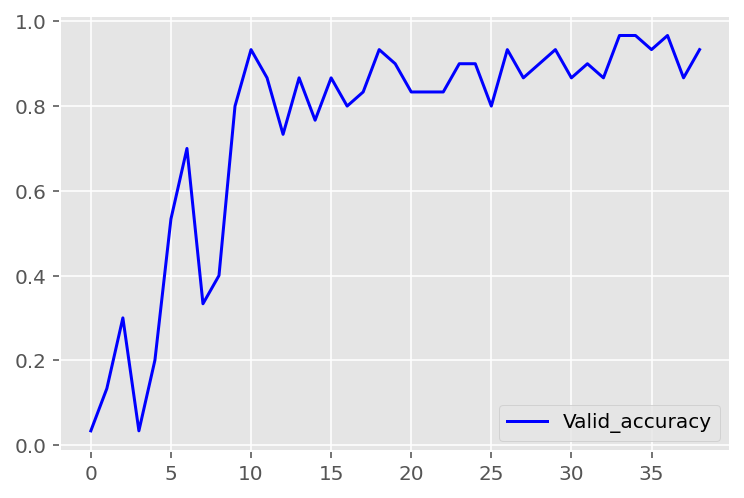

/content/mobilenetv3.pytorch
/content
2 1 1
Epoch: 1 	Training Loss: 343.796385 	Validation Loss: 309.030905 	Validation Accuracy: 0.033333
Validation loss decreased (inf --> 309.030905).  Saving model ...
Time per epoch: 1.880 seconds
Epoch: 2 	Training Loss: 560.357538 	Validation Loss: 166.414704 	Validation Accuracy: 0.100000
Validation loss decreased (309.030905 --> 166.414704).  Saving model ...
Time per epoch: 1.888 seconds
Epoch: 3 	Training Loss: 756.952245 	Validation Loss: 131.609602 	Validation Accuracy: 0.433333
Validation loss decreased (166.414704 --> 131.609602).  Saving model ...
Time per epoch: 1.880 seconds
Epoch: 4 	Training Loss: 484.288437 	Validation Loss: 120.237694 	Validation Accuracy: 0.133333
Validation loss decreased (131.609602 --> 120.237694).  Saving model ...
Time per epoch: 1.882 seconds
Epoch: 5 	Training Loss: 212.630053 	Validation Loss: 112.183506 	Validation Accuracy: 0.066667
Validation loss decreased (120.237694 --> 112.183506).  Saving model ..

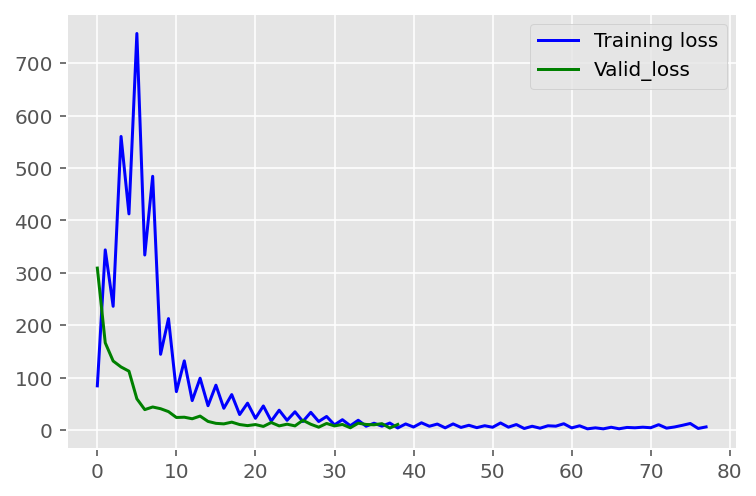

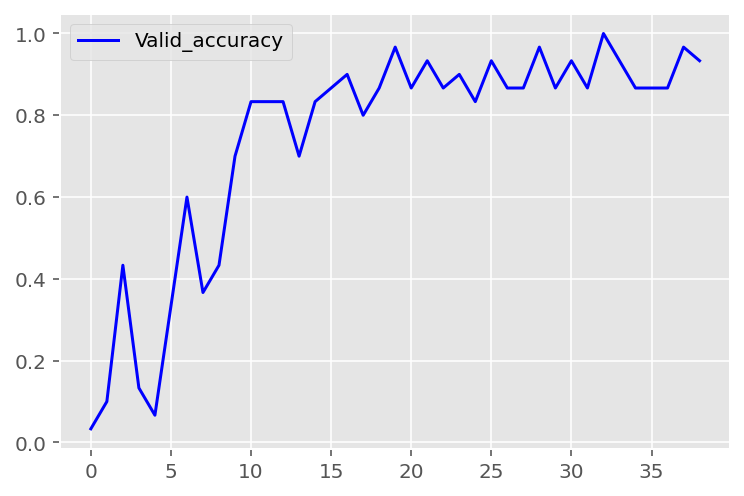

/content/mobilenetv3.pytorch
/content
2 1 1
Epoch: 1 	Training Loss: 408.672937 	Validation Loss: 303.304596 	Validation Accuracy: 0.000000
Validation loss decreased (inf --> 303.304596).  Saving model ...
Time per epoch: 1.863 seconds
Epoch: 2 	Training Loss: 439.412596 	Validation Loss: 131.976514 	Validation Accuracy: 0.266667
Validation loss decreased (303.304596 --> 131.976514).  Saving model ...
Time per epoch: 1.878 seconds
Epoch: 3 	Training Loss: 335.836676 	Validation Loss: 78.328879 	Validation Accuracy: 0.266667
Validation loss decreased (131.976514 --> 78.328879).  Saving model ...
Time per epoch: 1.862 seconds
Epoch: 4 	Training Loss: 156.003690 	Validation Loss: 91.543901 	Validation Accuracy: 0.066667
Time per epoch: 1.786 seconds
Epoch: 5 	Training Loss: 117.080153 	Validation Loss: 65.998650 	Validation Accuracy: 0.333333
Validation loss decreased (78.328879 --> 65.998650).  Saving model ...
Time per epoch: 1.869 seconds
Epoch: 6 	Training Loss: 97.599482 	Validation 

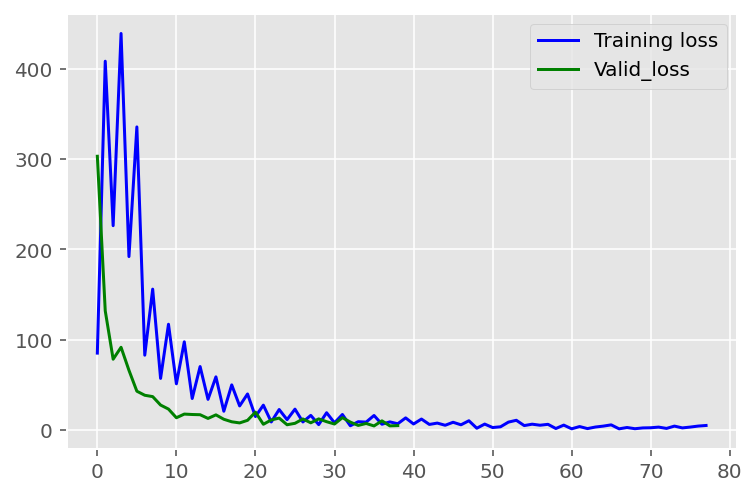

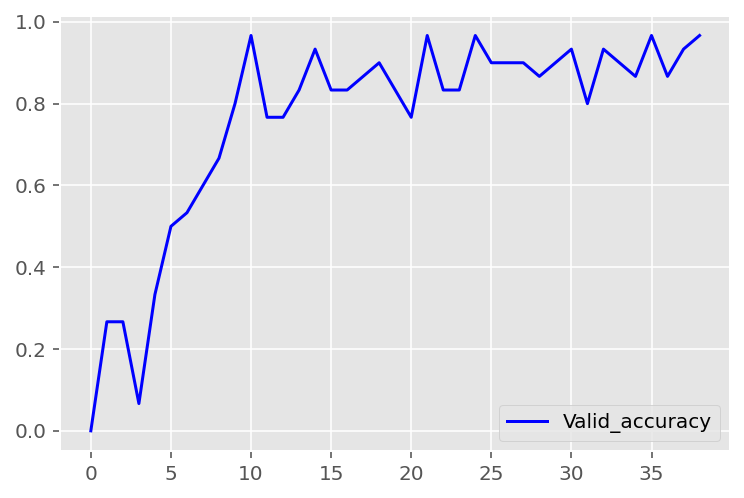

/content/mobilenetv3.pytorch
/content
2 1 1
Epoch: 1 	Training Loss: 438.952453 	Validation Loss: 256.101236 	Validation Accuracy: 0.000000
Validation loss decreased (inf --> 256.101236).  Saving model ...
Time per epoch: 1.902 seconds
Epoch: 2 	Training Loss: 407.486758 	Validation Loss: 83.271604 	Validation Accuracy: 0.300000
Validation loss decreased (256.101236 --> 83.271604).  Saving model ...
Time per epoch: 1.905 seconds
Epoch: 3 	Training Loss: 412.570995 	Validation Loss: 57.595825 	Validation Accuracy: 0.333333
Validation loss decreased (83.271604 --> 57.595825).  Saving model ...
Time per epoch: 1.887 seconds
Epoch: 4 	Training Loss: 174.537341 	Validation Loss: 115.020111 	Validation Accuracy: 0.066667
Time per epoch: 1.854 seconds
Epoch: 5 	Training Loss: 143.454839 	Validation Loss: 61.602874 	Validation Accuracy: 0.333333
Time per epoch: 1.797 seconds
Epoch: 6 	Training Loss: 121.541963 	Validation Loss: 34.942178 	Validation Accuracy: 0.666667
Validation loss decreased

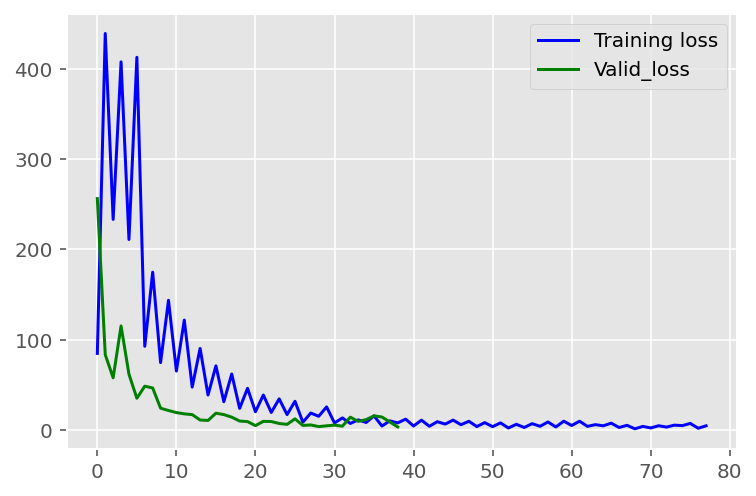

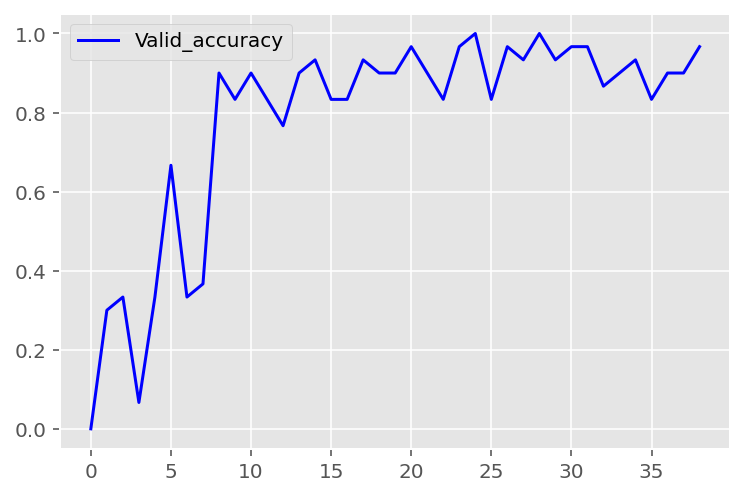

In [ ]:
from numpy import array
from sklearn.model_selection import KFold
# data sample
data = np.array(indices)
# prepare cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
# enumerate splits
for train, valid in kfold.split(data):
  %cd /content/mobilenetv3.pytorch
  from mobilenetv3 import mobilenetv3_large, mobilenetv3_small
  
  net_large = mobilenetv3_large()
  net_small = mobilenetv3_small()

  #net_large.load_state_dict(torch.load('pretrained/mobilenetv3-large-1cd25616.pth'))
  net_small.load_state_dict(torch.load('pretrained/mobilenetv3-small-55df8e1f.pth'))
  %cd /content
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  #pretrained=True will download a pretrained network for us
  #model = models.mobilenet_v2(pretrained=True)
  model = net_small
  
  for param in model.parameters():
    param.require_grad = True
  fc = nn.Sequential(
    nn.Linear(576, 1152),
    #nn.BatchNorm1d(1152),
    nn.ReLU(),
    nn.Dropout(0.2),
    
    nn.Linear(1152,14),
    nn.LogSoftmax(dim=1)
    )

  model.classifier = fc
  criterion = nn.NLLLoss()
  #Over here we want to only update the parameters of the classifier so
  optimizer = torch.optim.Adam(model.classifier.parameters(), lr=0.01)
  model.to(device)



  train_sampler = SubsetRandomSampler(train_idx)
  valid_sampler = SubsetRandomSampler(valid_idx)
  test_sampler = SubsetRandomSampler(test_idx)

# prepare data loaders (combine dataset and sampler)
  train_loader = torch.utils.data.DataLoader(train_data, batch_size=64,
  sampler=train_sampler, num_workers=num_workers, pin_memory=True)
  valid_loader = torch.utils.data.DataLoader(train_data, batch_size=64, 
  sampler=valid_sampler, num_workers=num_workers, pin_memory=True)
  test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, 
  sampler=test_sampler, num_workers=num_workers, pin_memory=True)
  print(len(train_loader), len(valid_loader), len(test_loader))
  
  
  epochs = 40
  valid_loss_min = np.Inf 
  import time 
  loss_values = []
  valid_loss_values =[]
  valid_accuracy_values = []
  for epoch in range(epochs):
    start = time.time()
    
    #scheduler.step()
    model.train()
    
    train_loss = 0.0
    accuracy = 0
    valid_loss = 0.0

    if epoch >= 39:
      plt.plot(loss_values,'b', label='Training loss')
      plt.plot(valid_loss_values,'g', label='Valid_loss')
      plt.legend()
      plt.show()
      plt.plot(valid_accuracy_values,'b', label='Valid_accuracy')
      plt.legend()
      plt.show()
    else:
      for inputs, labels in train_loader:
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        logps = model(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        #train_loss += loss.item()
        train_loss += loss.item()* inputs.size(0)
        epoch_loss = train_loss / len(train_loader)
        loss_values.append(epoch_loss)
      
        
       
      model.eval()
    
      with torch.no_grad():

        accuracy = 0
        for inputs, labels in valid_loader:
            
            inputs, labels = inputs.to(device), labels.to(device)
            logps = model.forward(inputs)
            batch_loss = criterion(logps, labels)

            #valid_loss += batch_loss.item()
            valid_loss += batch_loss.item()* inputs.size(0)
            loss = valid_loss/len(valid_loader)
            valid_loss_values.append(loss)

            # Calculate accuracy
            ps = torch.exp(logps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
            valid_acc = accuracy/len(valid_loader) 
            valid_accuracy_values.append(valid_acc)
                    
            
            
      # calculate average losses
        train_loss = train_loss/len(train_loader)
        valid_loss = valid_loss/len(valid_loader)
        valid_accuracy = accuracy/len(valid_loader) 
      
      # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tValidation Accuracy: {:.6f}'.format(
        epoch + 1, train_loss, valid_loss, valid_accuracy))
            
    
    
      if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        model_save_name = "Herd14v1-mnv3TTsplit-KFold-test.pt"
        path = F"/content/drive/My Drive/Herd/Herd14v1/{model_save_name}" 

        torch.save(model.state_dict(), path)
        valid_loss_min = valid_loss        
       
      print(f"Time per epoch: {(time.time() - start):.3f} seconds")


      

         
      
      
#print('train: %s, valid: %s' % (data[train], data[valid]))

In [ ]:
model.load_state_dict(torch.load('/content/drive/My Drive/Herd/Herd14v1/Herd14v1-mnv3TTsplit-KFold-test.pt'))

In [ ]:
def load_input_image(img_path):    
    image = Image.open(img_path)
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor(), 
                                     transforms.Normalize([0.485, 0.456, 0.406], 
                                                          [0.229, 0.224, 0.225])])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    return image

In [ ]:
def test(model, criterion):
  # monitor test loss and accuracy
  test_loss = 0.
  correct = 0.
  total = 0.
  for batch_idx, (data, target) in enumerate(test_loader):
    # move to GPU
    if torch.cuda.is_available():
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update average test loss 
    test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
    # convert output probabilities to predicted class
    pred = output.data.max(1, keepdim=True)[1]
    # compare predictions to true label
    correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
    total += data.size(0)
            
  print('Test Loss: {:.6f}\n'.format(test_loss))
  print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
test(model, criterion)

Test Loss: 0.004155


Test Accuracy: 100% (16/16)


In [ ]:
def predict_cattle(model, class_names, img_path):
    # load the image and return the predicted breed
    img = load_input_image(img_path)
    model = model.cpu()
    model.eval()
    idx = torch.argmax(model(img))
    #print(idx)
    return class_names[idx]

In [ ]:
from glob import glob
from PIL import Image
from termcolor import colored

class_names=['cow1','cow10','cow11','cow12','cow13','cow14','cow2','cow3','cow4','cow5','cow6','cow7','cow8','cow9']

In [ ]:
cnt = 0

for j in range(1,15):
  cow_name = 'cow'+str(j)
  print("Actual Cow:", cow_name)
  images = np.array(glob(img_dir1 + cow_name+"/*"))
  for i in range(2):
      img_path=images[i]
      img = Image.open(img_path)
      if predict_cattle(model, class_names, img_path) == cow_name:
        print(img_path)
        print("Predicted", colored(cow_name, 'green'))
      else:
        cnt += 1
        print(img_path, "FP")
        print(colored(predict_cattle(model, class_names, img_path), 'red'))

          
      # plt.imshow(img)
      # plt.show()

print("Total missclassified images:", cnt)

# **Retraining the model for 20 epochs to reduce loss using weights of previous epochs**

In [ ]:
%cd /content/mobilenetv3.pytorch

/content/mobilenetv3.pytorch


In [ ]:
from mobilenetv3 import mobilenetv3_large, mobilenetv3_small

net_large = mobilenetv3_large()
net_small = mobilenetv3_small()

#net_large.load_state_dict(torch.load('pretrained/mobilenetv3-large-1cd25616.pth'))
#net_small.load_state_dict(torch.load('pretrained/mobilenetv3-small-55df8e1f.pth'))

In [ ]:
%cd /content

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#pretrained=True will download a pretrained network for us
#model = models.mobilenet_v2(pretrained=True)
model = net_small
# num_ftrs = model.classifier.in_features
# print(num_ftrs)
model

MobileNetV3(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): h_swish(
        (sigmoid): h_sigmoid(
          (relu): ReLU6(inplace=True)
        )
      )
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): SELayer(
          (avg_pool): AdaptiveAvgPool2d(output_size=1)
          (fc): Sequential(
            (0): Linear(in_features=16, out_features=8, bias=True)
            (1): ReLU(inplace=True)
            (2): Linear(in_features=8, out_features=16, bias=True)
            (3): h_sigmoid(
              (relu): ReLU6(inplace=True)
            )
          

In [ ]:
len(train_data.classes)
print(train_data.classes)

['cow1', 'cow10', 'cow11', 'cow12', 'cow13', 'cow14', 'cow2', 'cow3', 'cow4', 'cow5', 'cow6', 'cow7', 'cow8', 'cow9']


In [ ]:
#Freezing model parameters and defining the fully connected network to be attached to the model, loss function and the optimizer.
#We there after put the model on the GPUs
for param in model.parameters():
  param.require_grad = True
fc = nn.Sequential(
    nn.Linear(576, 1152),
    #nn.BatchNorm1d(1152),
    nn.ReLU(),
    nn.Dropout(0.2),
    
    nn.Linear(1152,14),
    nn.LogSoftmax(dim=1)
    
)

model.classifier = fc
criterion = nn.NLLLoss()
#Over here we want to only update the parameters of the classifier so
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=0.01)
model.to(device)

MobileNetV3(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): h_swish(
        (sigmoid): h_sigmoid(
          (relu): ReLU6(inplace=True)
        )
      )
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): SELayer(
          (avg_pool): AdaptiveAvgPool2d(output_size=1)
          (fc): Sequential(
            (0): Linear(in_features=16, out_features=8, bias=True)
            (1): ReLU(inplace=True)
            (2): Linear(in_features=8, out_features=16, bias=True)
            (3): h_sigmoid(
              (relu): ReLU6(inplace=True)
            )
          

In [ ]:
model.load_state_dict(torch.load('/content/drive/My Drive/Herd/Herd14v1/Herd14v1-mnv3TTsplit-KFold-test.pt'))

<All keys matched successfully>

In [ ]:
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32,
sampler=train_sampler, num_workers=num_workers, pin_memory=True)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=32, 
sampler=valid_sampler, num_workers=num_workers, pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32, 
sampler=test_sampler, num_workers=num_workers, pin_memory=True)
print(len(train_loader), len(valid_loader), len(test_loader))

4 1 1


In [ ]:
epochs = 20
valid_loss_min = np.Inf 
import time 
loss_values = []
valid_loss_values =[]
valid_accuracy_values = []
for epoch in range(epochs):
    start = time.time()
    
    #scheduler.step()
    model.train()
    
    train_loss = 0.0
    accuracy = 0
    valid_loss = 0.0
    
    
    
    
    for inputs, labels in train_loader:
      # Move input and label tensors to the default device
      inputs, labels = inputs.to(device), labels.to(device)
      optimizer.zero_grad()
      logps = model(inputs)
      loss = criterion(logps, labels)
      loss.backward()
      optimizer.step()

      train_loss += loss.item()* inputs.size(0)
      epoch_loss = train_loss / len(train_loader)
      loss_values.append(epoch_loss)


          
       
    model.eval()

    

    with torch.no_grad():
      
      for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        logps = model.forward(inputs)
        batch_loss = criterion(logps, labels)

        valid_loss += batch_loss.item()* inputs.size(0)
        loss = valid_loss/len(valid_loader)
        valid_loss_values.append(loss)
        #plt.plot(valid_loss_values)

      

      # Calculate accuracy
      ps = torch.exp(logps)
      top_p, top_class = ps.topk(1, dim=1)
      equals = top_class == labels.view(*top_class.shape)
      accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
      valid_acc = accuracy/len(valid_loader) 
      valid_accuracy_values.append(valid_acc)
      #plt.plot(valid_accuracy_values)

        
  # calculate average losses
    train_loss = train_loss/len(train_loader)
    
    valid_loss = valid_loss/len(valid_loader)
    
    valid_accuracy = accuracy/len(valid_loader) 
      
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tValidation Accuracy: {:.6f}'.format(
        epoch + 1, train_loss, valid_loss, valid_accuracy))
            
    
    
    if valid_loss <= valid_loss_min:
      
      
      print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
      valid_loss_min,
      valid_loss))
      model_save_name = "Herd14v1-mnv3TTsplit-KFold-best1.pt"
      path = F"/content/drive/My Drive/Herd/Herd14v1/{model_save_name}" 

      torch.save(model.state_dict(), path)
      valid_loss_min = valid_loss        
       
    print(f"Time per epoch: {(time.time() - start):.3f} seconds")
#plt.plot(loss_values)
#plt.plot(accuracy)
#print('train: %s, valid: %s' % (data[train], data[valid]))

Epoch: 1 	Training Loss: 23.147645 	Validation Loss: 3.204407 	Validation Accuracy: 0.966667
Validation loss decreased (inf --> 3.204407).  Saving model ...
Time per epoch: 1.823 seconds
Epoch: 2 	Training Loss: 36.646023 	Validation Loss: 7.200604 	Validation Accuracy: 0.966667
Time per epoch: 1.735 seconds
Epoch: 3 	Training Loss: 13.449458 	Validation Loss: 10.503235 	Validation Accuracy: 0.866667
Time per epoch: 1.755 seconds
Epoch: 4 	Training Loss: 13.167528 	Validation Loss: 3.047614 	Validation Accuracy: 1.000000
Validation loss decreased (3.204407 --> 3.047614).  Saving model ...
Time per epoch: 1.826 seconds
Epoch: 5 	Training Loss: 10.751692 	Validation Loss: 1.452787 	Validation Accuracy: 1.000000
Validation loss decreased (3.047614 --> 1.452787).  Saving model ...
Time per epoch: 1.875 seconds
Epoch: 6 	Training Loss: 5.620415 	Validation Loss: 3.973799 	Validation Accuracy: 0.933333
Time per epoch: 1.781 seconds
Epoch: 7 	Training Loss: 7.567062 	Validation Loss: 2.509604

In [ ]:
print(loss_values)
print(valid_loss_values)
print(valid_accuracy_values)

[1.5192818641662598, 3.835800886154175, 7.1856935024261475, 7.2887785425409675, 2.1398143768310547, 3.1067763566970825, 3.884898006916046, 6.675635546445847, 1.3794445991516113, 1.379685878753662, 1.3805233240127563, 2.3784324005246162, 0.04783773422241211, 0.05929088592529297, 0.06405091285705566, 1.0580916926264763, 0.44603872299194336, 0.5867214202880859, 0.8196924924850464, 3.7182764559984207, 2.675849437713623, 2.777103066444397, 3.192379951477051, 3.1995255943620577, 1.2163124084472656, 1.3594425916671753, 1.8228029012680054, 1.8311227557715029, 1.855713129043579, 3.969102382659912, 3.9750876426696777, 3.994205951457843, 0.30727899074554443, 2.1504361629486084, 3.9473605155944824, 4.665266044437885, 0.05830109119415283, 0.4253336191177368, 2.795580267906189, 3.4111811742186546, 0.025303363800048828, 0.3412105441093445, 0.881093442440033, 0.8974015112034976, 0.5800073146820068, 2.229831337928772, 5.5551735162734985, 7.686798930168152, 0.26987022161483765, 0.8439578413963318, 1.332

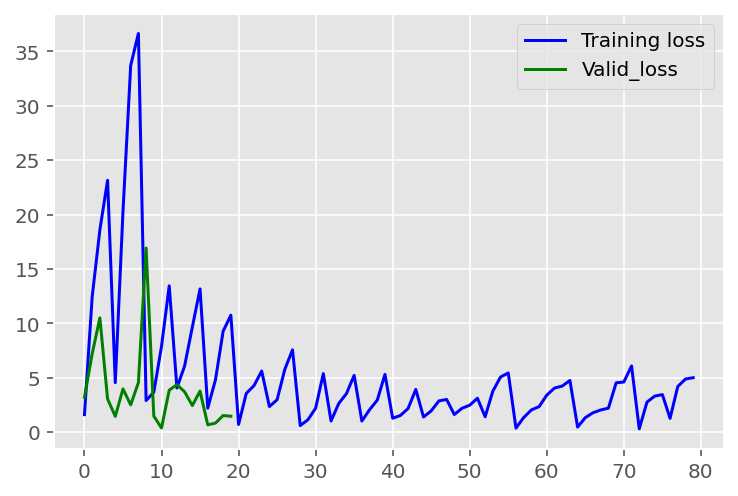

In [ ]:
plt.plot(loss_values,'b', label='Training loss')
plt.plot(valid_loss_values,'g', label='Valid_loss')
plt.legend()
plt.show()
#plt.plot(valid_loss_values)
#plt.plot(valid_accuracy_values)

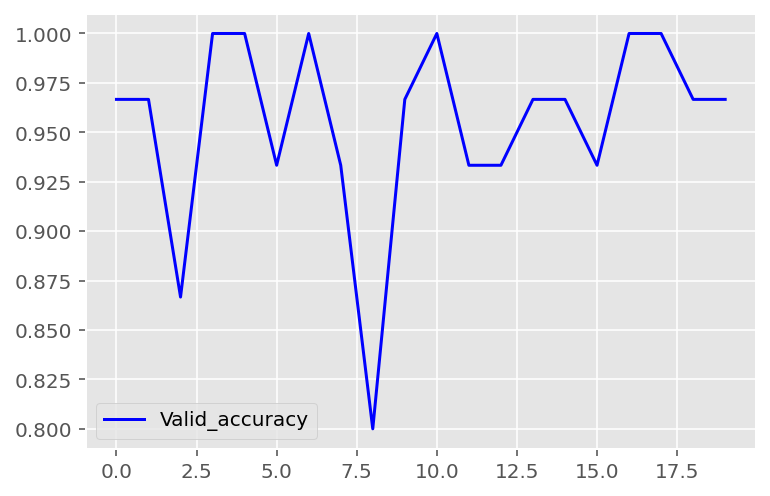

In [ ]:
plt.plot(valid_accuracy_values,'b', label='Valid_accuracy')
plt.legend()
plt.show()

In [ ]:
model.load_state_dict(torch.load('/content/drive/My Drive/Herd/Herd14v1/Herd14v1-mnv3TTsplit-KFold-best.pt'))

<All keys matched successfully>

In [ ]:
def load_input_image(img_path):    
    image = Image.open(img_path)
    prediction_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                     transforms.ToTensor(), 
                                     transforms.Normalize([0.485, 0.456, 0.406], 
                                                          [0.229, 0.224, 0.225])])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = prediction_transform(image)[:3,:,:].unsqueeze(0)
    return image

In [ ]:
def test(model, criterion):
  # monitor test loss and accuracy
  test_loss = 0.
  correct = 0.
  total = 0.
  for batch_idx, (data, target) in enumerate(test_loader):
    # move to GPU
    if torch.cuda.is_available():
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update average test loss 
    test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
    # convert output probabilities to predicted class
    pred = output.data.max(1, keepdim=True)[1]
    # compare predictions to true label
    correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
    total += data.size(0)
            
  print('Test Loss: {:.6f}\n'.format(test_loss))
  print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
test(model, criterion)

Test Loss: 0.004155


Test Accuracy: 100% (16/16)


In [ ]:
def predict_cattle(model, class_names, img_path):
    # load the image and return the predicted breed
    img = load_input_image(img_path)
    model = model.cpu()
    model.eval()
    idx = torch.argmax(model(img))
    #print(idx)
    return class_names[idx]

In [ ]:
from glob import glob
from PIL import Image
from termcolor import colored

class_names=['cow1','cow10','cow11','cow12','cow13','cow14','cow2','cow3','cow4','cow5','cow6','cow7','cow8','cow9']

In [ ]:
cnt = 0

for j in range(1,3):
  cow_name = 'cow'+str(j)
  print("Actual Cow:", cow_name)
  images = np.array(glob(img_dir1 + cow_name+"/*"))
  for i in range(2):
      img_path=images[i]
      img = Image.open(img_path)
      if predict_cattle(model, class_names, img_path) == cow_name:
        print(img_path)
        print("Predicted", colored(cow_name, 'green'))
      else:
        cnt += 1
        print(img_path, "FP")
        print(colored(predict_cattle(model, class_names, img_path), 'red'))

          
      # plt.imshow(img)
      # plt.show()

print("Total missclassified images:", cnt)

Actual Cow: cow1
/content/Herd14/test/cow1/DSC00884.JPG
Predicted cow1
/content/Herd14/test/cow1/DSC00852.JPG
Predicted cow1
Actual Cow: cow2
/content/Herd14/test/cow2/DSC01002.JPG
Predicted cow2
/content/Herd14/test/cow2/DSC00965.JPG
Predicted cow2
Total missclassified images: 0


In [ ]:
cnt = 0

for j in range(3,15):
  cow_name = 'cow'+str(j)
  print("Actual Cow:", cow_name)
  images = np.array(glob(img_dir1 + cow_name+"/*"))
  for i in range(1):
      img_path=images[i]
      img = Image.open(img_path)
      if predict_cattle(model, class_names, img_path) == cow_name:
          print(img_path)
          print("Predicted", colored(cow_name, 'green'))
      else:
          cnt += 1
          print(img_path, "FP")
          print(colored(predict_cattle(model, class_names, img_path), 'red'))
      # plt.imshow(img)
      # plt.show()

print("Total missclassified images:", cnt)

Actual Cow: cow3
/content/Herd14/test/cow3/DSC01115.JPG
Predicted cow3
Actual Cow: cow4
/content/Herd14/test/cow4/DSC01184.JPG
Predicted cow4
Actual Cow: cow5
/content/Herd14/test/cow5/DSC01330.JPG
Predicted cow5
Actual Cow: cow6
/content/Herd14/test/cow6/DSC00541.JPG
Predicted cow6
Actual Cow: cow7
/content/Herd14/test/cow7/DSC00644.JPG
Predicted cow7
Actual Cow: cow8
/content/Herd14/test/cow8/DSC02682.JPG
Predicted cow8
Actual Cow: cow9
/content/Herd14/test/cow9/DSC02755.JPG
Predicted cow9
Actual Cow: cow10
/content/Herd14/test/cow10/DSC02864.JPG
Predicted cow10
Actual Cow: cow11
/content/Herd14/test/cow11/DSC03008.JPG
Predicted cow11
Actual Cow: cow12
/content/Herd14/test/cow12/DSC03087.JPG
Predicted cow12
Actual Cow: cow13
/content/Herd14/test/cow13/DSC03238.JPG
Predicted cow13
Actual Cow: cow14
/content/Herd14/test/cow14/DSC03345.JPG
Predicted cow14
Total missclassified images: 0
